# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
y = y.reshape(len(y),1) # because feature scalling required the array to be in 2d array format

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

ss_x = StandardScaler()
ss_y = StandardScaler()
y_scaled = ss_y.fit_transform(y)
x_scaled = ss_x.fit_transform(x)


In [16]:
print(x_scaled)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [17]:
print(y_scaled)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [7]:
from sklearn.svm import SVR

svr_reg = SVR()
svr_reg.fit(x_scaled,y_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [11]:
prediction = ss_y.inverse_transform(svr_reg.predict(ss_x.transform([[10]])).reshape(-1,1))
print(prediction)

[[557821.75899897]]


## Visualising the SVR results

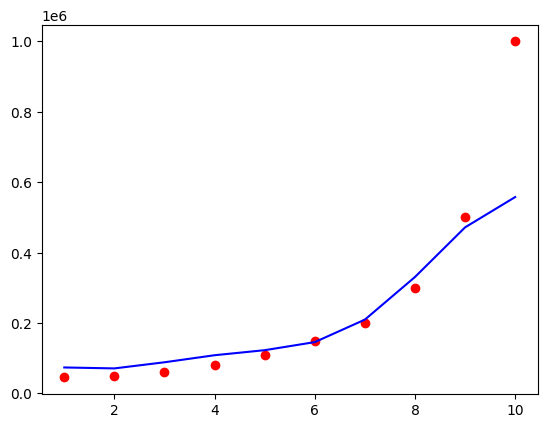

In [17]:
plt.scatter(ss_x.inverse_transform(x_scaled),ss_y.inverse_transform(y_scaled),color='red')
plt.plot(ss_x.inverse_transform(x_scaled),ss_y.inverse_transform(svr_reg.predict(x_scaled).reshape(-1,1)),color = 'blue')